In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
# Import dataset
train = pd.read_csv("/content/drive/MyDrive/Ignacio Fiori Training/Machine Learning/Titanic/train.csv")

**DATA EXPLORATION**

In [ ]:
train.shape

(891, 12)

In [ ]:
train, test=train_test_split(train, test_size=.2)

In [ ]:
train.shape

(712, 12)

In [ ]:
test.shape

(179, 12)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.500,NaN,Q
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.600,A16,C
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.750,NaN,Q
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.050,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 604 to 72
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,573.000000,712.000000,712.000000,712.000000
mean,442.202247,0.389045,2.293539,30.054834,0.516854,0.394663,32.168790
std,254.278934,0.487876,0.833249,14.730446,1.084216,0.821733,48.099402
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,445.500000,0.000000,3.000000,28.000000,0.000000,0.000000,15.022900
75%,662.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that about 38% of the passengers survived. Also the passengers age range from 0.4 to 80. Besides there are missing values

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S


From the information above, we can note some things. First of all, that we need to convert a lot of features into numeric ones, so that the machine learning algorithms can process them. Besides, we can see that the features have different ranges, we will need to convert into the same scale. Finally there are also other features with missing valures(NaN).

In [ ]:
train_missing = train.isna().sum() / train.shape[0]
train_missing[train_missing > 0.0]

Age         0.195225
Cabin       0.765449
Embarked    0.002809
dtype: float64

In [ ]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:3])
print(null)

            0
Cabin     545
Age       139
Embarked    2


In [ ]:
test_missing = test.isna().sum() / train.shape[0]
test_missing[test_missing > 0.0]

Age      0.053371
Cabin    0.199438
dtype: float64

In [ ]:
null=pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:3])
print(null)

            0
Cabin     142
Age        38
Embarked    0


From these results we can see that we will deal in a easier way with Embarked feature that with Age and Cabin.

In [ ]:
train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.002245,-0.022910,0.048686,-0.054691,0.009216,0.000740
Survived,-0.002245,1.000000,-0.322831,-0.053231,-0.042991,0.076053,0.239981
Pclass,-0.022910,-0.322831,1.000000,-0.406850,0.085590,0.046249,-0.554243
Age,0.048686,-0.053231,-0.406850,1.000000,-0.313628,-0.178998,0.116849
SibSp,-0.054691,-0.042991,0.085590,-0.313628,1.000000,0.417968,0.150627
Parch,0.009216,0.076053,0.046249,-0.178998,0.417968,1.000000,0.190665
Fare,0.000740,0.239981,-0.554243,0.116849,0.150627,0.190665,1.000000


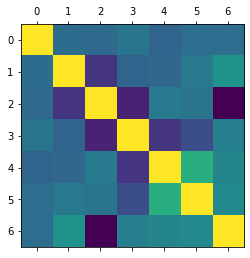

In [ ]:
plt.matshow(train.corr())

In [ ]:
print(train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1       0.624277
2       0.464968
3       0.251309


People of upper class tend have more probability of survive

In [ ]:
print(train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False))

        Survived
Sex             
female   0.74400
male     0.19697


Womens have more probability of survive than men

In [ ]:
print(train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False))

       Survived
SibSp          
1      0.536585
2      0.391304
0      0.356557
3      0.214286
4      0.214286
5      0.000000
8      0.000000


In [ ]:
print(train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False))

       Survived
Parch          
3      0.600000
1      0.563830
2      0.477612
0      0.349442
5      0.250000
4      0.000000
6      0.000000


SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [ ]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()


1    430
0    282
Name: not_alone, dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C,0,1
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1,0
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S,0,1
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S,0,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,2,0


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.500,NaN,Q,1,0
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q,5,0
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.600,A16,C,1,0
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.750,NaN,Q,0,1
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.050,NaN,S,0,1


In [ ]:
print(train[["relatives", "Survived"]].groupby(['relatives']).mean().sort_values(by='Survived', ascending=False))

           Survived
relatives          
3          0.750000
1          0.569106
2          0.541176
6          0.363636
0          0.313953
4          0.166667
5          0.117647
7          0.000000
10         0.000000


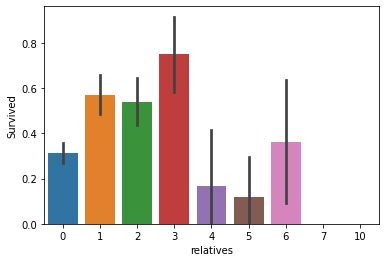

In [ ]:
import seaborn as sns

sns.barplot(x='relatives', y='Survived', data=train)


People with few relative have a good probability of survive. Surprisingly people with 6 relatives also has a good probability of survive.

In [ ]:
train['relatives'].describe()

count    712.000000
mean       0.911517
std        1.611066
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: relatives, dtype: float64

In [ ]:
train['relatives'].value_counts()

0     430
1     123
2      85
3      24
5      17
4      12
6      11
10      5
7       5
Name: relatives, dtype: int64

**Data Preprocessing**

First, I will drop ‘PassengerId’ from the train set.

In [ ]:
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)


In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
604,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,C,0,1,8
855,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S,1,0,8
614,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,S,0,1,8
482,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,S,0,1,8
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,S,2,0,8


In [ ]:
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
241,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.500,Q,1,0,8
278,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,Q,5,0,8
556,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.600,C,1,0,1
654,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.750,Q,0,1,8
89,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.050,S,0,1,8


**AGE**

Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [ ]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = train["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
train["Age"].isnull().sum()

0

**EMBARKED**

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one

In [ ]:
common_value = 'S'
train['Embarked'] = train['Embarked'].fillna(common_value)

In [ ]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:3])
print(null)

           0
Deck       0
not_alone  0
relatives  0


In [ ]:
null=pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:3])
print(null)

           0
Deck       0
not_alone  0
relatives  0


**Converting Features**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 604 to 72
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   712 non-null    int64  
 1   Pclass     712 non-null    int64  
 2   Name       712 non-null    object 
 3   Sex        712 non-null    object 
 4   Age        712 non-null    int64  
 5   SibSp      712 non-null    int64  
 6   Parch      712 non-null    int64  
 7   Ticket     712 non-null    object 
 8   Fare       712 non-null    float64
 9   Embarked   712 non-null    object 
 10  relatives  712 non-null    int64  
 11  not_alone  712 non-null    int64  
 12  Deck       712 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 97.9+ KB


**Fare**

Converting “Fare” from float to int64, using the “astype()” function pandas provides:


In [ ]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**Name**

We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that

In [ ]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

**Sex**

Convert ‘Sex’ feature into numeric.


In [ ]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**Ticket**

In [ ]:
train['Ticket'].describe()


count        712
unique       562
top       347088
freq           6
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [ ]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

**Embarked**

Convert ‘Embarked’ feature into numeric.


In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Creating Categories**

**Age**

Now we need to convert the age feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group.

In [ ]:
age_slice = pd.qcut(train['Age'], 10)
train['Age'] = age_slice
test['Age'] = age_slice


In [ ]:
data = [train, test]
for dataset in data:
  dataset['Age'] = LabelEncoder().fit_transform(dataset['Age'])

In [ ]:
train['Age'].value_counts()

6    85
0    83
3    74
5    73
2    73
8    71
9    67
4    67
1    64
7    55
Name: Age, dtype: int64

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
604,1,1,0,6,0,0,26,1,0,1,8,1
855,1,3,1,1,0,1,9,0,1,0,8,3
614,0,3,0,6,0,0,8,0,0,1,8,1
482,0,3,0,9,0,0,8,0,0,1,8,1
172,1,3,1,0,1,1,11,0,2,0,8,2


**Fare**

For the Fare feature, we need to do the same as with the ‘Age’ feature.

In [ ]:
fare_slice = pd.qcut(train['Fare'], 6)
train['Fare'] = fare_slice
test['Fare'] = fare_slice

In [ ]:
data = [train, test]
for dataset in data:
  dataset['Fare'] = LabelEncoder().fit_transform(dataset['Fare'])

In [ ]:
train['Fare'].value_counts()

0    181
2    137
3    120
5    119
4     96
1     59
Name: Fare, dtype: int64

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
604,1,1,0,6,0,0,3,1,0,1,8,1
855,1,3,1,1,0,1,2,0,1,0,8,3
614,0,3,0,6,0,0,1,0,0,1,8,1
482,0,3,0,9,0,0,1,0,0,1,8,1
172,1,3,1,0,1,1,2,0,2,0,8,2


In [ ]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
241,1,3,1,0,1,0,0,2,1,0,8,2
278,0,3,0,0,4,1,0,2,5,0,8,4
556,1,1,1,0,1,0,0,1,1,0,1,5
654,0,3,1,0,0,0,0,2,0,1,8,2
89,0,3,0,0,0,0,0,0,0,1,8,1


**Model**

In [ ]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1)
Y_test = test["Survived"]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 11)
(179, 11)
(712,)
(179,)



**Random Forest:**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       114
           1       0.79      0.69      0.74        65

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



**Logistic Regression:**


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       114
           1       0.67      0.82      0.74        65

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



**Perceptron:**

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       114
           1       0.74      0.82      0.77        65

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76388889 0.80555556 0.87323944 0.76056338 0.88732394 0.8028169
 0.77464789 0.81690141 0.74647887 0.8028169 ]
Mean: 0.8034233176838811
Standard Deviation: 0.04423933407386334


**Feature Importance**


In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.210
Age,0.184
Sex,0.150
Fare,0.111
Deck,0.088
Pclass,0.081
relatives,0.061
Embarked,0.042
SibSp,0.037


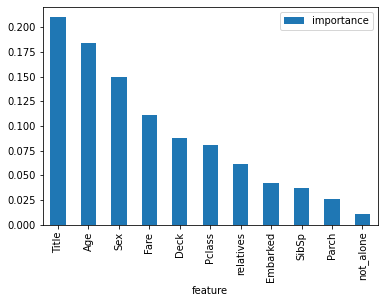

In [ ]:
importances.plot.bar()


not_alone and Parch don’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. 

In [ ]:
train_df  = train.drop("not_alone", axis=1)
test_df  = test.drop("not_alone", axis=1)

train_df  = train.drop("Parch", axis=1)
test_df  = test.drop("Parch", axis=1)

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

93.38 %


**Hyperparameter Tuning**


In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': [50, 60, 70],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [10, 12],
    'n_estimators': [400, 500, 600]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, Y_train)
grid_search.best_params_


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  3.9min finished


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 600}

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 600, bootstrap = True, max_depth = 50, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 12, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

88.33 %
